### AVERAGING MULTIPLE GOOGLE TRENDS SAMPLES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## GOOGLE TRENDS AS A WAY TO IMPROVE FORECASTING ABILITIES

As the study from [Medeiros & Pires (2021)](https://arxiv.org/pdf/2104.03065.pdf) points out, "*Google makes available only a small sample of its search database. What most researchers and practitioners seem not to know (or to ignore) is the fact that this small sample is ***not always the same***. In fact, it is constantly changing. This means that someone who downloads Google Trend data today will not download the same data tomorrow, even if she filters the same topics, languages and location*".

This is not a feature Google itself wants to hide:  
Information about the subject can be easily found as easily as in the [FAQs](https://support.google.com/trends/answer/4365533?hl=it), where it is clearly stated that, since Google handles billions of research queries per day, it is not possible for it to provide access to the entire dataset, because it would be too large to process quickly. To work around this obstacle, **only a small sample of Google searches** are actually used in Google Trends: by sampling, Google gives access to a dataset that is -*generally*- **representative of all searches**, and that can be processed *within minutes* of an event happening (say you want to know more about the breakout of a pandemic..).

Unfortunately, this also means that someone who downloads data today will not download the same data tomorrow, even if you filter for the same topics, languages and locations.

Text(0, 0.5, 'Query Index')

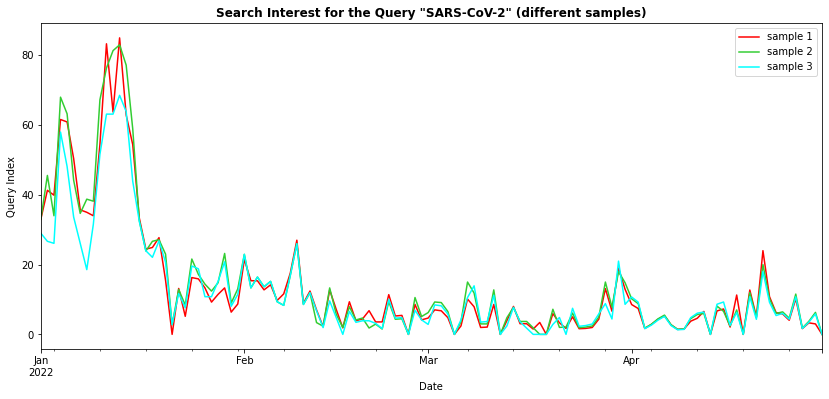

In [2]:
# comparison between two samples: plot
trends_040522 = pd.read_csv('gt_04052022.csv',parse_dates=['date'], index_col=['date'])
trends_090522 = pd.read_csv('gt_09052022.csv',parse_dates=['date'], index_col=['date'])
trends_120522 = pd.read_csv('gt_12052022.csv',parse_dates=['date'], index_col=['date'])

trends_040522 = trends_040522[trends_040522.index >= '2022-01-01']
trends_090522 = trends_090522[trends_090522.index >= '2022-01-01']
trends_120522 = trends_120522[trends_120522.index >= '2022-01-01']

fig, ax = plt.subplots(figsize=(14, 6))
trends_040522['SARS-CoV-2'].plot(color='red', label='sample 1')
trends_090522['SARS-CoV-2'].plot(color='limegreen', label='sample 2')
trends_120522['SARS-CoV-2'].plot(color='cyan', label='sample 3')

ax.legend(ncol=1, loc='upper right', frameon=True)
plt.title('Search Interest for the Query "SARS-CoV-2" (different samples)', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Query Index')

Of course, this fact should not stop us from employing Google Trends as a research tool:  
as [Medeiros & Pires (2021)](https://arxiv.org/pdf/2104.03065.pdf) explain, one of the viable ways to assess and work around this problem is to gather many different samples and then averaging across every term, getting a more reliable time series of that term. in brief, *taking averages of many samples, improve the **series consistency***.

In [17]:
trends_030522 = pd.read_csv('gt_03052022.csv',parse_dates=['date'], index_col=['date'])
trends_040522 = pd.read_csv('gt_04052022.csv',parse_dates=['date'], index_col=['date'])
trends_050522 = pd.read_csv('gt_05052022.csv',parse_dates=['date'], index_col=['date'])
trends_060522 = pd.read_csv('gt_06052022.csv',parse_dates=['date'], index_col=['date'])
trends_090522 = pd.read_csv('gt_09052022.csv',parse_dates=['date'], index_col=['date'])
trends_100522 = pd.read_csv('gt_10052022.csv',parse_dates=['date'], index_col=['date'])
trends_110522 = pd.read_csv('gt_11052022.csv',parse_dates=['date'], index_col=['date'])
trends_120522 = pd.read_csv('gt_12052022.csv',parse_dates=['date'], index_col=['date'])

trends_030522

,Coronavirus,SARS-CoV-2,Covid Symptoms,Covid Vaccine,Intensive Care
date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.00,NaN,NaN,NaN,1.11
...,...,...,...,...,...
2022-04-26,0.71,10.20,14.04,1.14,0.45
2022-04-27,0.70,1.65,10.62,1.10,1.32
2022-04-28,0.70,3.30,12.06,0.00,2.46


Text(0, 0.5, 'Query Index')

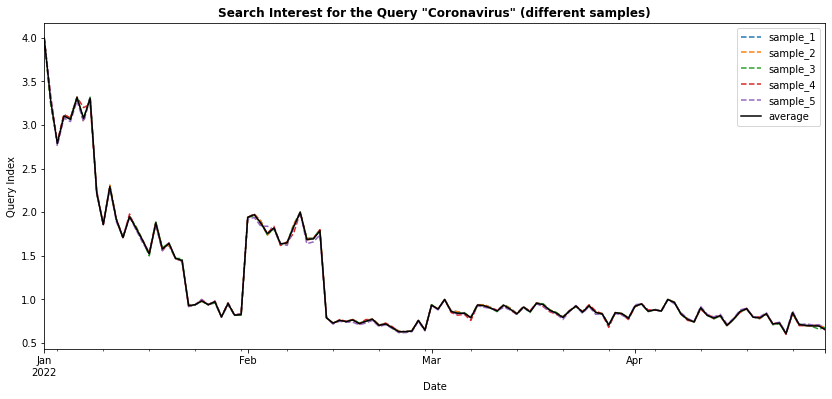

In [15]:
trends_coronavirus = pd.concat([trends_030522[['Coronavirus']], trends_040522[['Coronavirus']], trends_050522[['Coronavirus']],
                    trends_060522[['Coronavirus']], trends_090522[['Coronavirus']], trends_100522[['Coronavirus']],
                    trends_110522[['Coronavirus']], trends_120522[['Coronavirus']]], axis=1)

trends_coronavirus.columns = ['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8']  # same keyword, different samples
trends_coronavirus['Coronavirus'] = trends_coronavirus.mean(axis=1)   # average of all samples 

fig, ax = plt.subplots(figsize=(14, 6))
trends_coronavirus[trends_coronavirus.index >= '2022-01-01']['sample_1'].plot(linestyle='--')
trends_coronavirus[trends_coronavirus.index >= '2022-01-01']['sample_2'].plot(linestyle='--')
trends_coronavirus[trends_coronavirus.index >= '2022-01-01']['sample_3'].plot(linestyle='--')
trends_coronavirus[trends_coronavirus.index >= '2022-01-01']['sample_4'].plot(linestyle='--')
trends_coronavirus[trends_coronavirus.index >= '2022-01-01']['sample_5'].plot(linestyle='--')
trends_coronavirus[trends_coronavirus.index >= '2022-01-01']['Coronavirus'].plot(color='black',label='average')
ax.legend(ncol=1, loc='upper right', frameon=True)
plt.title('Search Interest for the Query "Coronavirus" (different samples)', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Query Index')                                                    

Text(0, 0.5, 'Query Index')

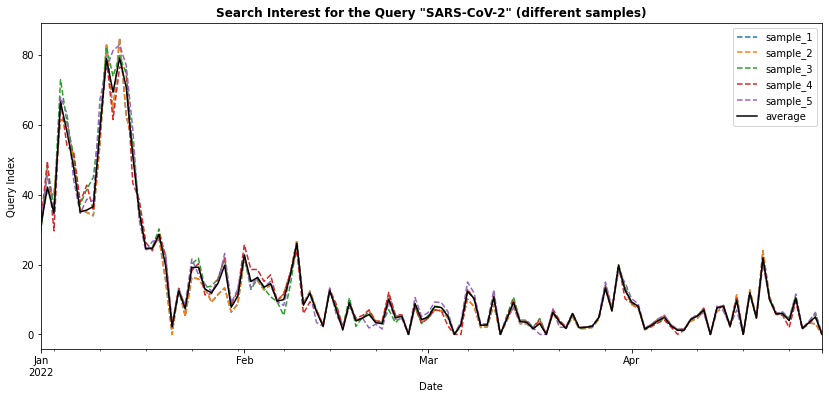

In [14]:
trends_sarscov2 = pd.concat([trends_030522[['SARS-CoV-2']], trends_040522[['SARS-CoV-2']], trends_050522[['SARS-CoV-2']],
                    trends_060522[['SARS-CoV-2']], trends_090522[['SARS-CoV-2']], trends_100522[['SARS-CoV-2']],
                    trends_110522[['SARS-CoV-2']], trends_120522[['SARS-CoV-2']]], axis=1)

trends_sarscov2.columns = ['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8']  # same keyword, different samples
trends_sarscov2['SARS-CoV-2'] = trends_sarscov2.mean(axis=1)   # average of all samples 

fig, ax = plt.subplots(figsize=(14, 6))
trends_sarscov2[trends_sarscov2.index >= '2022-01-01']['sample_1'].plot(linestyle='--')
trends_sarscov2[trends_sarscov2.index >= '2022-01-01']['sample_2'].plot(linestyle='--')
trends_sarscov2[trends_sarscov2.index >= '2022-01-01']['sample_3'].plot(linestyle='--')
trends_sarscov2[trends_sarscov2.index >= '2022-01-01']['sample_4'].plot(linestyle='--')
trends_sarscov2[trends_sarscov2.index >= '2022-01-01']['sample_5'].plot(linestyle='--')
trends_sarscov2[trends_sarscov2.index >= '2022-01-01']['SARS-CoV-2'].plot(color='black', label='average')
ax.legend(ncol=1, loc='upper right', frameon=True)
plt.title('Search Interest for the Query "SARS-CoV-2" (different samples)', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Query Index') 

Text(0, 0.5, 'Query Index')

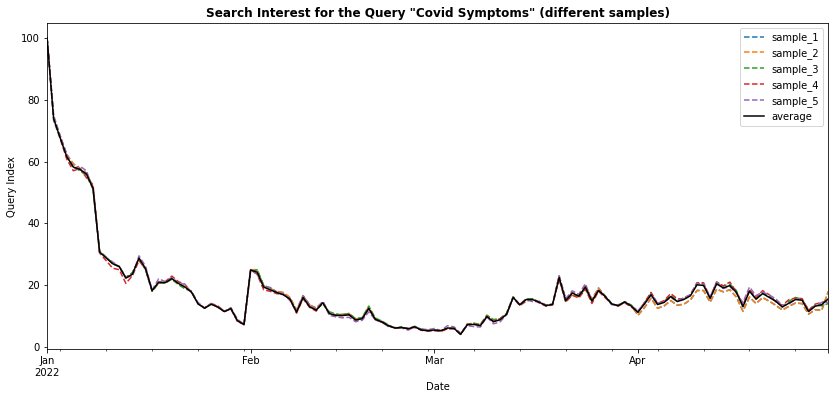

In [18]:
trends_symptoms = pd.concat([trends_030522[['Covid Symptoms']], trends_040522[['Covid Symptoms']], trends_050522[['Covid Symptoms']],
                    trends_060522[['Covid Symptoms']], trends_090522[['Covid Symptoms']], trends_100522[['Covid Symptoms']],
                    trends_110522[['Covid Symptoms']], trends_120522[['Covid Symptoms']]], axis=1)

trends_symptoms.columns = ['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8']  # same keyword, different samples
trends_symptoms['Covid Symptoms'] = trends_symptoms.mean(axis=1)   # average of all samples 

fig, ax = plt.subplots(figsize=(14, 6))
trends_symptoms[trends_symptoms.index >= '2022-01-01']['sample_1'].plot(linestyle='--')
trends_symptoms[trends_symptoms.index >= '2022-01-01']['sample_2'].plot(linestyle='--')
trends_symptoms[trends_symptoms.index >= '2022-01-01']['sample_3'].plot(linestyle='--')
trends_symptoms[trends_symptoms.index >= '2022-01-01']['sample_4'].plot(linestyle='--')
trends_symptoms[trends_symptoms.index >= '2022-01-01']['sample_5'].plot(linestyle='--')
trends_symptoms[trends_symptoms.index >= '2022-01-01']['Covid Symptoms'].plot(color='black', label='average')
ax.legend(ncol=1, loc='upper right', frameon=True)
plt.title('Search Interest for the Query "Covid Symptoms" (different samples)', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Query Index') 

Text(0, 0.5, 'Query Index')

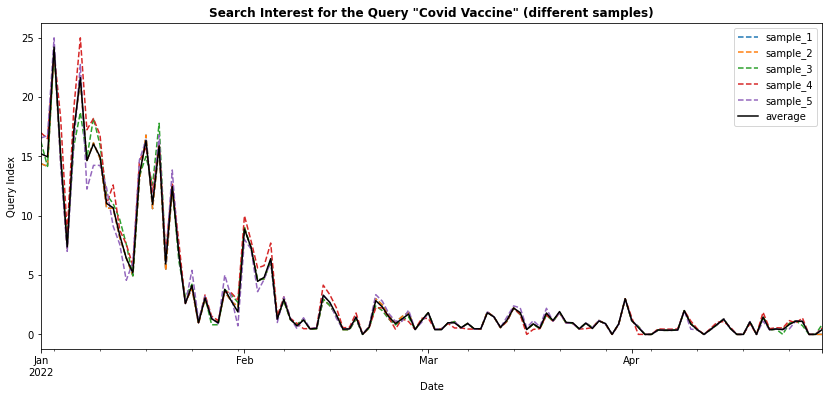

In [19]:
trends_vaccine = pd.concat([trends_030522[['Covid Vaccine']], trends_040522[['Covid Vaccine']], trends_050522[['Covid Vaccine']],
                    trends_060522[['Covid Vaccine']], trends_090522[['Covid Vaccine']], trends_100522[['Covid Vaccine']],
                    trends_110522[['Covid Vaccine']], trends_120522[['Covid Vaccine']]], axis=1)

trends_vaccine.columns = ['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8']  # same keyword, different samples
trends_vaccine['Covid Vaccine'] = trends_vaccine.mean(axis=1)   # average of all samples 

fig, ax = plt.subplots(figsize=(14, 6))
trends_vaccine[trends_vaccine.index >= '2022-01-01']['sample_1'].plot(linestyle='--')
trends_vaccine[trends_vaccine.index >= '2022-01-01']['sample_2'].plot(linestyle='--')
trends_vaccine[trends_vaccine.index >= '2022-01-01']['sample_3'].plot(linestyle='--')
trends_vaccine[trends_vaccine.index >= '2022-01-01']['sample_4'].plot(linestyle='--')
trends_vaccine[trends_vaccine.index >= '2022-01-01']['sample_5'].plot(linestyle='--')
trends_vaccine[trends_vaccine.index >= '2022-01-01']['Covid Vaccine'].plot(color='black',label='average')
ax.legend(ncol=1, loc='upper right', frameon=True)
plt.title('Search Interest for the Query "Covid Vaccine" (different samples)', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Query Index')  

Text(0, 0.5, 'Query Index')

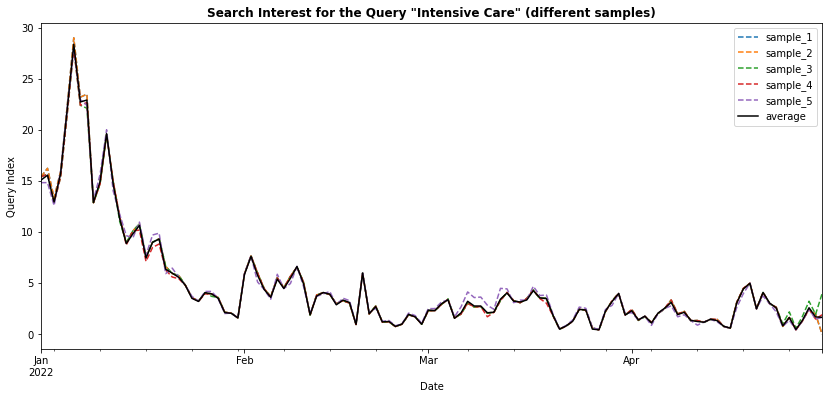

In [21]:
trends_intensivecare = pd.concat([trends_030522[['Intensive Care']], trends_040522[['Intensive Care']], trends_050522[['Intensive Care']],
                    trends_060522[['Intensive Care']], trends_090522[['Intensive Care']], trends_100522[['Intensive Care']],
                    trends_110522[['Intensive Care']], trends_120522[['Intensive Care']]], axis=1)

trends_intensivecare.columns = ['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8']  # same keyword, different samples
trends_intensivecare['Intensive Care'] = trends_intensivecare.mean(axis=1)   # average of all samples 

fig, ax = plt.subplots(figsize=(14, 6))
trends_intensivecare[trends_intensivecare.index >= '2022-01-01']['sample_1'].plot(linestyle='--')
trends_intensivecare[trends_intensivecare.index >= '2022-01-01']['sample_2'].plot(linestyle='--')
trends_intensivecare[trends_intensivecare.index >= '2022-01-01']['sample_3'].plot(linestyle='--')
trends_intensivecare[trends_intensivecare.index >= '2022-01-01']['sample_4'].plot(linestyle='--')
trends_intensivecare[trends_intensivecare.index >= '2022-01-01']['sample_5'].plot(linestyle='--')
trends_intensivecare[trends_intensivecare.index >= '2022-01-01']['Intensive Care'].plot(color='black',label='average')
ax.legend(ncol=1, loc='upper right', frameon=True)
plt.title('Search Interest for the Query "Intensive Care" (different samples)', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Query Index')     

In [23]:
trends_data = pd.concat([trends_coronavirus[['Coronavirus']], trends_sarscov2[['SARS-CoV-2']],
                        trends_symptoms[['Covid Symptoms']], trends_vaccine[['Covid Vaccine']],
                        trends_intensivecare[['Intensive Care']]], axis=1)

trends_data.to_csv('gt_cov_ita.csv')
trends_data

,Coronavirus,SARS-CoV-2,Covid Symptoms,Covid Vaccine,Intensive Care
date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.00000,NaN,NaN,NaN,1.09375
...,...,...,...,...,...
2022-04-26,0.71250,10.44125,15.1425,1.1175,0.47625
2022-04-27,0.70375,1.67250,11.4750,1.0900,1.36750
2022-04-28,0.69750,3.38125,13.1850,0.0000,2.60250
